In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [198]:
data = pd.read_csv('D:\maks\lab4\wine.csv')

In [199]:
# Дан датасет “wine.csv”. Он состоит из 178 строк(наблюдений) и 14 столбцов (признаков\переменных). 
# Задача состоит в том, чтобы определить количество кластеров методом k-mean (k-средних).

In [208]:
def heat(data):
    '''матрица корреляций, посмотреть какие признаки коррелируют друг с другом'''
    corr = data.corr()
    f,ax = plt.subplots(figsize = (10,10))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr,annot=True,cmap = cmap) 

def pca_2d(X,rank = None):
    '''использует PCA для усечения размерности до 2 главных компонент'''
    model_pca = PCA(n_components=2).fit(X)
    model_pca = model_pca.transform(X)
    f = plt.figure(figsize=(6,6))
    sns.scatterplot(model_pca[:,0], model_pca[:,1],hue = rank)
    
def check_clusters(X,klusters):
    '''Показывает график сум квадратов ошибки (отклонения\растояние) от центроидов'''
    sse = []
    for k in range(1,klusters):
        km = KMeans(n_clusters = k)
        km.fit(X_std)
        sse.append(km.inertia_)
    return sse, klusters





In [209]:
# Так как дана задача выполнить кластеризацию алгоритмом k-mean, то нужно подготовить данные для 
# алгоритма. Во первых из сета было бы не плохо удалить признак Class – который уже классифицирует вина.
# Такой признак является неуместным для данной задачи(кластеризации)

In [210]:
X = data.loc[:,'Alcohol':'Proline'] # признак "Class" не входит в независиммые признаки(сичитается своего рода подсказкой для модели), считаю что он не должен учавтсвовать в задаче кластеризации
rank = data.loc[:,'Class']
X

,Alcohol,Malic_acid,Ash,Alcanlity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [211]:
# От сюда же видим, что все переменные являются непрерывными, 
# значит преобразовывать пока ничего не нужно 
# (в отличии от случая, когда переменные являются строками).

In [212]:
# Так же с помощью heatmap можно убедиться, что нету утерянных данных 
# (в случае наличия таковых - некоторые из клеток будут не закрашены - белые). 

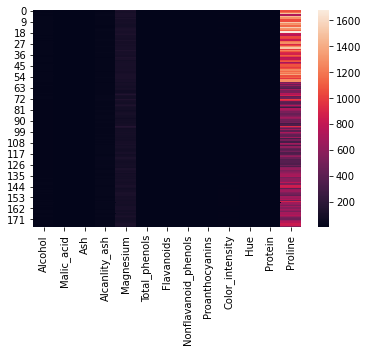

In [213]:
sns.heatmap(X)

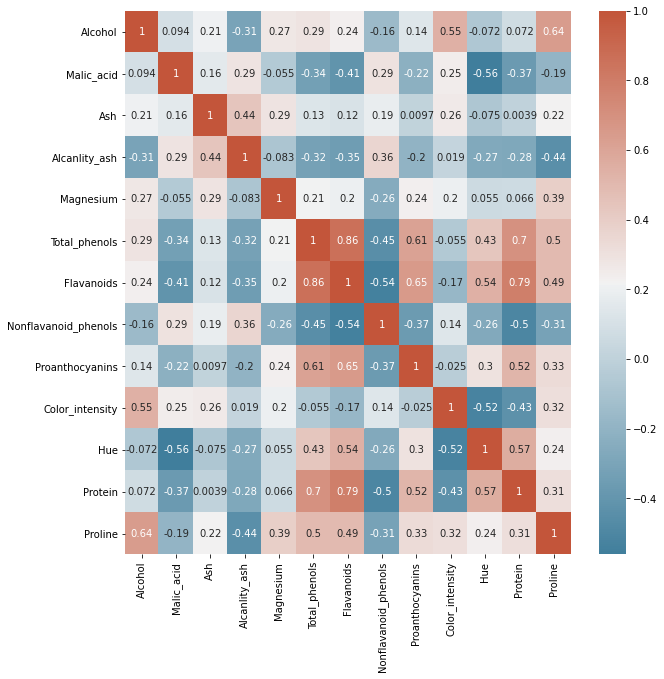

In [214]:
# Так же, для анализа данных можно построить матрицу рассеяний, 
# но она строится очень долго для высокоразмерных данных, а так же не будет являться репрезентативной 
# (слишком много двумерных графиков корреляций получается, что тяжело изучать). 
# Вместо этого можно построить матрицу корреляций на основе heatmap 
# (на которой показана картина корреляций признаков друг с другом), 
# но по сути она не облегчает процесс.
heat(X)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


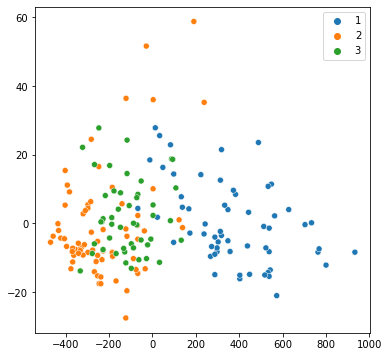

In [224]:
# В случаях высокоразмерных данных уменьшают количество признаков (до 2 в данном случае) 
# с целью, чтобы наглядно показать распределение точек данных в 2-мерном пространстве.
# Для этого можно использовать PCA (Principal Component Analysis). 
# В результате можно увидеть следующее распределение точек данных и их классификации: 
rank = [str(x) for x in rank]
pca_2d(X, rank)

In [219]:
# Видно, кластеры довольно сильно смешаны, если подать такой набор данных в k-mean, 
# то алоритм, возможно, не совсем точно сможет кластеризовать данные 
# (даже не принимая во внимание что сам алгоритм не самый точный и испытывает проблемы в 
# случае сложных, но очевидных для человека данных). 
# Результат кластеризации на данный момент: 

In [220]:
# коластеризация (на данный момент на 3 кластера)
model = KMeans(n_clusters=3)
model = model.fit(X)
model.predict(X)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


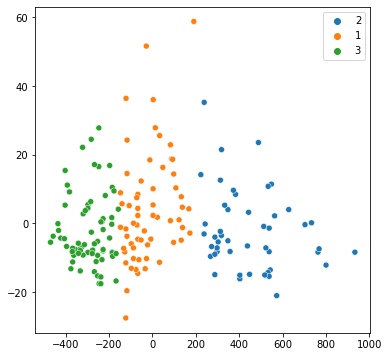

In [221]:
# результат кластеризации наглядно
pca_2d(X,[str(x+1) for x in model.labels_])

In [222]:
# Очевидно, что k-mean не справляется с кластеризацией на должном уровне, 
# но к счастью ему можно помочь. 
# Для этого можно сделать нормализацию входных данных, но каким методом?
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


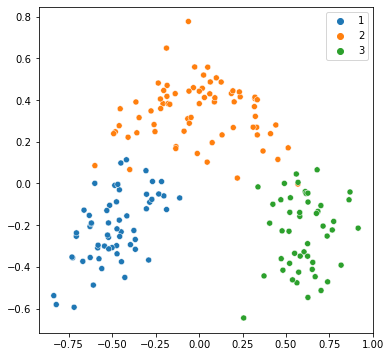

In [226]:
# MinMaxScaler - сдвигает данные таким образом, чтобы все признаки находились строго в диапазоне от 0 до 1
scaler = MinMaxScaler()
X_std = scaler.fit(X).transform(X)
pca_2d(X_std,rank)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


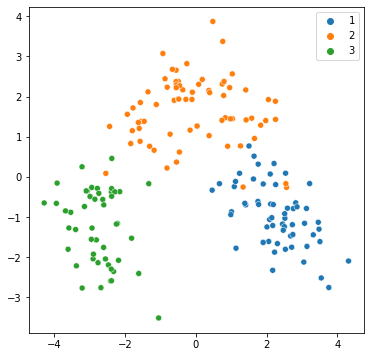

In [227]:
# StandardScaler - гарантирует, что для каждого признака среднее будет равно 0, а дисперсия равна 1,
# в результате чего все признаки будут иметь один и тот же масштаб
scaler = StandardScaler()
X_std = scaler.fit(X).transform(X)
pca_2d(X_std,rank)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


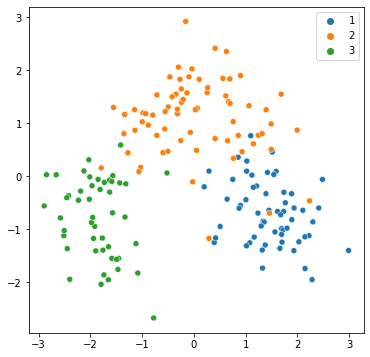

In [228]:
# RobustScaler - аналогичен StandardScaler в том плане, что в результате признаки будут иметь
# один и тот же масштаб, однако вмесо среднего и дисперсии использует медиану и квартели (25%-75%),
# так как метрики используемые в этом методе более робастны (нечувствительны к выбросам) от сюда и название
scaler = RobustScaler()
X_std = scaler.fit(X).transform(X)
pca_2d(X_std,rank)

In [229]:
# Исходя из анализа нормализации, можно сделать вывод, что все 3 метода неплохо преобразуют данные
# но всё же с некоторыми погрешностями

Text(0, 0.5, 'Sum of squared distance/error')

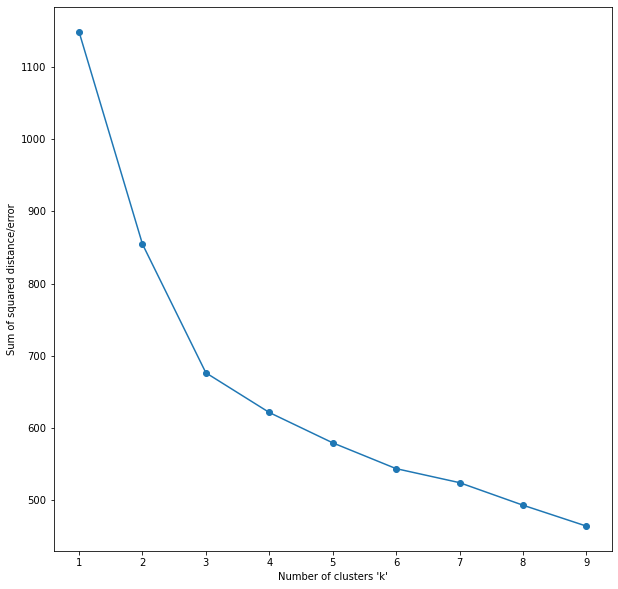

In [230]:
# Но все еще остается вопрос, какое количество кластеров оптимально для данной совокупности
sse, klusters =check_clusters(X,10)
plt.figure(figsize=(10, 10))
plt.plot(range(1,klusters), sse,'-o')
plt.xlabel("Number of clusters 'k'")
plt.ylabel('Sum of squared distance/error')

In [191]:
# Из графика видно, что оптимальное число кластеров равно 3 (как и было изначально), 
# т.к. для последующих SSE уменьшается незначительно и почи под одинаковым углом

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


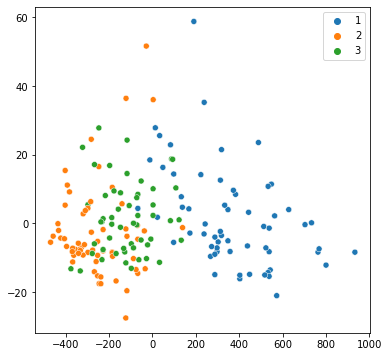

In [231]:
# Смотрим на результат кластеризации на 3 кластера методом k-mean 
# на основе данных предварительно нормализированых:
scaler = MinMaxScaler()
X_std = scaler.fit(X).transform(X)

# модель k-mean
model = KMeans(n_clusters = 3)
model = model.fit(X_std)
model.predict(X_std)

# распределение
pca_2d(X, [str(x+1) for x in model.labels_])


In [232]:
# очень похоже на изначальное

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


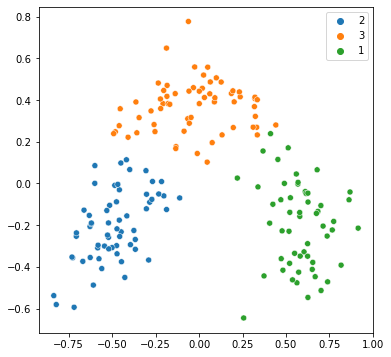

In [196]:
# усеченное до 2 компонент
pca_2d(X_std,[str(x+1) for x in model.labels_])